In [89]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("drug200.csv")
df = df.dropna()
df.head(20)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,DrugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,DrugY
9,43,M,LOW,NORMAL,19.368,DrugY


0      0
1      3
2      3
3      4
4      0
      ..
195    3
196    3
197    4
198    4
199    4
Name: Drug, Length: 200, dtype: int64
Axes(0.125,0.11;0.62x0.77)


C:\Users\hte12\AppData\Local\Temp\ipykernel_20060\1595992527.py:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(sns.heatmap(df.corr()))


array([[25.355, 23.   ,  0.   ,  0.   ],
       [13.093, 47.   ,  0.   ,  1.   ],
       [10.114, 47.   ,  0.   ,  1.   ],
       [ 7.798, 28.   ,  0.   ,  2.   ],
       [18.043, 61.   ,  0.   ,  1.   ],
       [ 8.607, 22.   ,  0.   ,  2.   ],
       [16.275, 49.   ,  0.   ,  2.   ],
       [11.037, 41.   ,  0.   ,  1.   ],
       [15.171, 60.   ,  0.   ,  2.   ],
       [19.368, 43.   ,  1.   ,  1.   ],
       [11.767, 47.   ,  0.   ,  1.   ],
       [19.199, 34.   ,  1.   ,  0.   ],
       [15.376, 43.   ,  0.   ,  1.   ],
       [20.942, 74.   ,  0.   ,  1.   ],
       [12.703, 50.   ,  0.   ,  2.   ],
       [15.516, 16.   ,  1.   ,  0.   ],
       [11.455, 69.   ,  1.   ,  1.   ],
       [13.972, 43.   ,  0.   ,  0.   ],
       [ 7.298, 23.   ,  0.   ,  1.   ],
       [25.974, 32.   ,  1.   ,  0.   ],
       [19.128, 57.   ,  1.   ,  1.   ],
       [25.917, 63.   ,  0.   ,  2.   ],
       [30.568, 47.   ,  1.   ,  1.   ],
       [15.036, 48.   ,  0.   ,  1.   ],
       [33.486, 

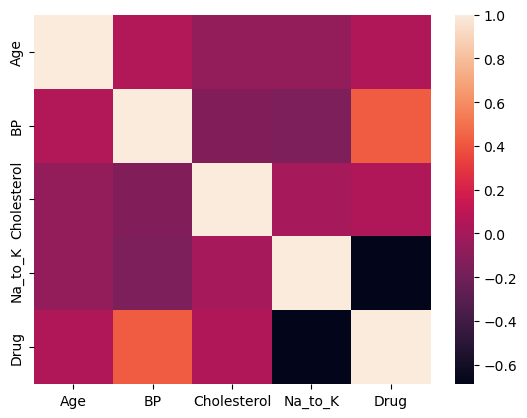

In [91]:
from sklearn.preprocessing import LabelEncoder
import numpy as np


encoder = LabelEncoder()

df["Drug"] = encoder.fit_transform(df["Drug"])
print(df["Drug"])
df["Cholesterol"] = encoder.fit_transform(df["Cholesterol"])
df["BP"] = encoder.fit_transform(df["BP"])

x = df[["Na_to_K", "Age", "Cholesterol", "BP"]]
y = df["Drug"]

print(sns.heatmap(df.corr()))

x = x[:500]
y = y[:500]
np.array(x)

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=.2, random_state=45)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        21
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3
           3       1.00      1.00      1.00         3
           4       0.91      1.00      0.95        10

    accuracy                           0.97        40
   macro avg       0.98      0.99      0.99        40
weighted avg       0.98      0.97      0.98        40



In [108]:
data = {
    "Na_to_K": [7.798, 3],
    "Age": [25, 30],
    "Cholesterol": [1, 0],
    "BP": [1,1]
}

inputs = pd.DataFrame(data=data)
inputs.head()

y_pred = model.predict(inputs)
print(y_pred)


[4 3]
